## CH03 運用YOLOv1
3-1 二階段物體偵測：R-CNN, Fast R-CNN以及Faster R-CNN　
<br>3-2 單階段物體偵測：與二階段物體偵測模型差異及待改進之處 
<br>3-3 YOLOv1 原理介紹與二階段物體偵測模型之優勢與劣勢　
<br>3-4 SSD 介紹：另一種單階段物體偵測模型　
<br>3-5 YOLOv1 實作1：Pascal VOC資料集上的模型訓練 　
<br>3-6 YOLOv1 實作2：口罩偵測 　<br>

### 3-1 二階段物體偵測：R-CNN, Fast R-CNN以及Faster R-CNN 
##### Two stage : 選取物件 -> 辨識物件 的網路分兩部分
##### one stage: 選取物件(bounding box)&辨識物件 在同一個網路
* Before Deep Learning : Sliding windows: Score every subwindow: http://www.pyimagesearch.com/2014/11/10/histogram-oriented-gradients-object-detection/
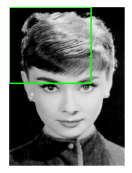
* Deformable part models (DPM): Uses HOG features ,Very fast
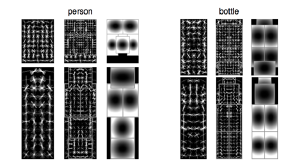https://cs.brown.edu/~pff/papers/lsvm-pami.pdf
#### Selective Search: 
* Selective Search is a region proposal algorithm used in object detection. It is designed to be fast with a very high recall. It is based on computing hierarchical grouping of similar regions based on color, texture, size and shape compatibility.
* Selective Search is widely used in early state-of-the-art architecture such as R-CNN, Fast R-CNN etc. However,Due to number of windows it processed, it takes anywhere from 1.8 to 3.7 seconds (Selective Search Fast) to generate region proposal which is not good enough for a real-time object detection system.
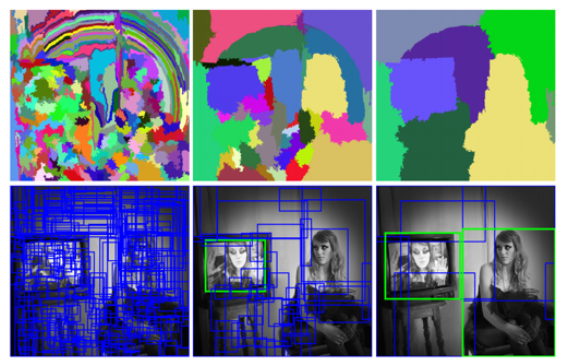
###  RCNN : Region Proposal + CNN ( two stage)
• Use selective search to come up with regional proposal
• First object detection method using CNN
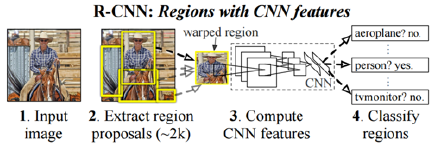 image 224*224
#### Training RCNN:
* Step 1： train your own CNN model for classification ( or use existing model), using ImageNet dataset.
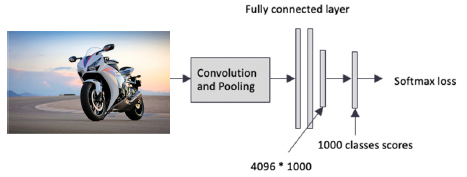
* Step 2：focus on 20 classes + 1 background. Remove the last FC layer and replace it with a smaller layer and fine-tune the model using PASCAL VOC dataset
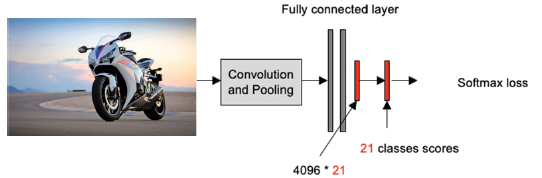
* Step 3：extract feature : Crop & Warp 裁剪和變形
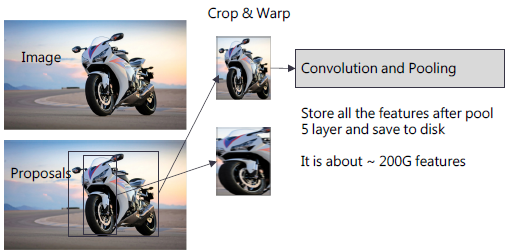
* Step 4：train SVM for each class
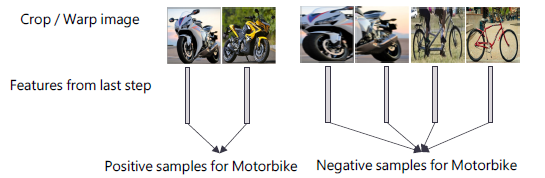
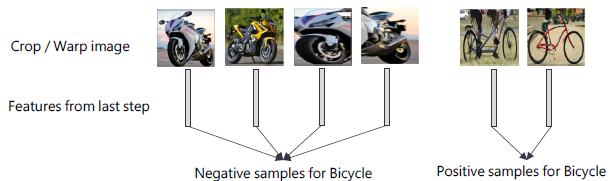
比較fine tune & without fine tune : 指標看 mAP
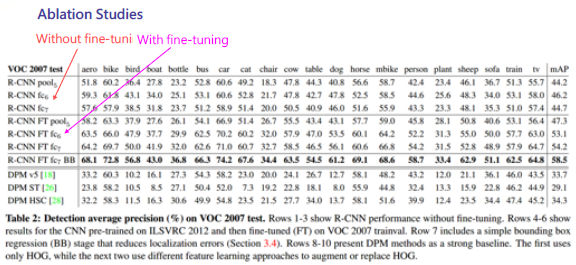


### Fast RCNN : softmax :分類，bbox regression : 微調位置
* input image 沒有固定大小，針對object ROI 做縮小pooling 進FC
* Share convolution layers for proposals from the same image
* Faster and More accurate than RCNN
* ROI Pooling
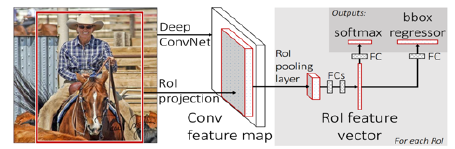
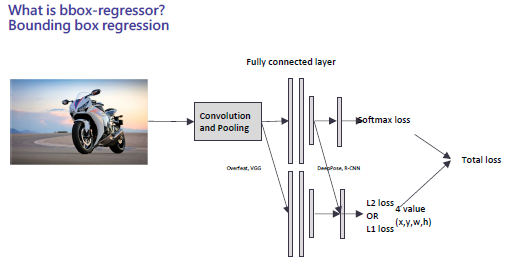
* Loss Function
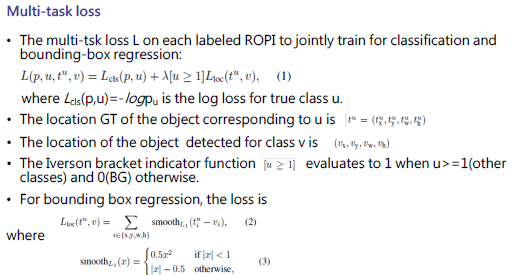
* fine tune 到 conv2 mAP 最大
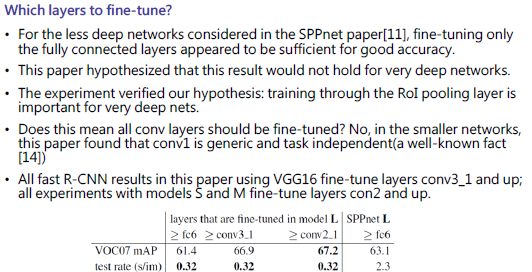
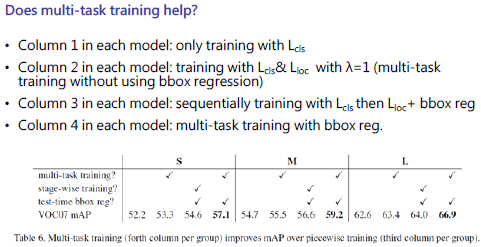
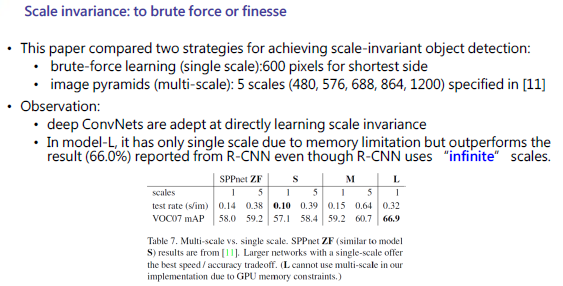
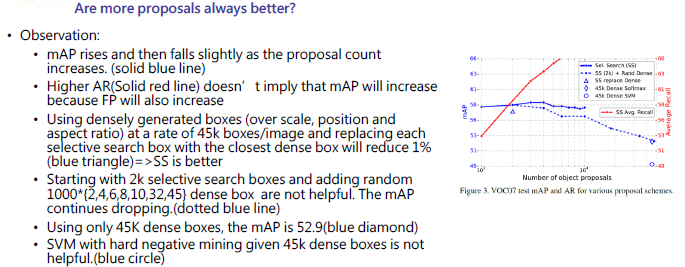
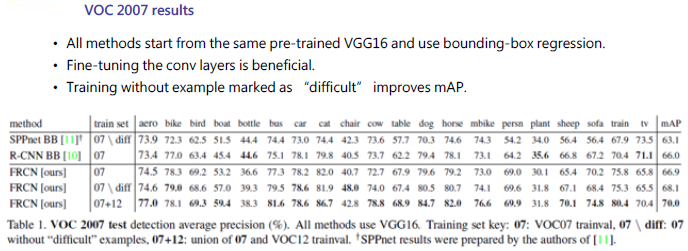
##### Conclusion of Fast R-CNN
* This paper proposes Fast R-CNN, a clean and fast update to R-CNN and SPPnet with advantages of
1. higher mAP then R-CNN & SPPnet.
2. Single-stage training using multi-task loss.
3. Updating all networks in training.
4. No disk storage is required for feature caching.
*  A lot of new insights are given for achieving high mAP.
*  Sparse object proposals appear to improve detector quality; however, undiscovered dense boxes might be beneficial.

### Faster RCNN
* Don’t need to have external regional proposals
* RPN - Regional Proposal Network
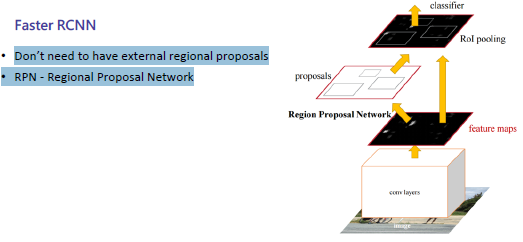
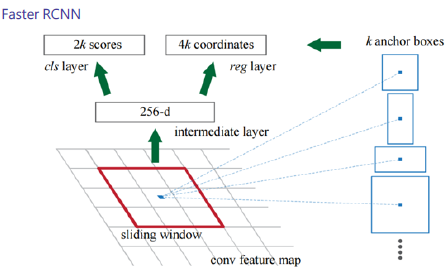
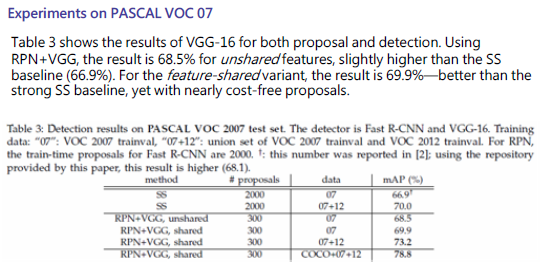
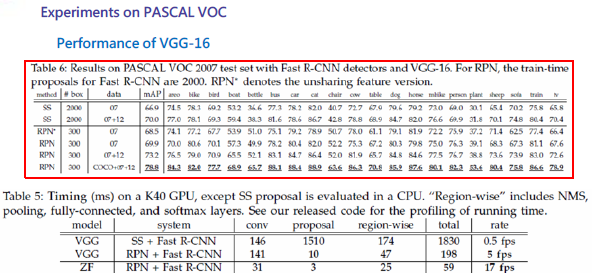
* Conclusions
1. This paper presents RPNs(Region Proposal network) for efficient and accurate region proposal generation.
2. By sharing convolutional features with the down-stream detection network, the region proposal step is nearly cost-free.
3. This work enables a unified, deep-learning-based object detection system to run at near real-time frame rates.
4. The learned RPN also improves region proposal quality and thus the overall object detection accuracy.

### 3-2 單階段物體偵測：與二階段物體偵 測模型差異及待改進之處
* Problems with 2 step detection : bounding box 比較準確
• Complex Pipeline
• Slow (Cannot run in real time)
• Hard to optimize each component
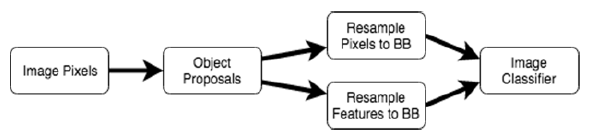

### 3-3 YOLOv1 原理介紹與二階段物體偵測模型之優勢與劣勢
* YOLO: You Only Look Once
1. Consider detection a regression problem
2. Use a single ConvNet
3. Run once on entire image. Very Fast!
* How it works
1. The following predictions are made for each cell in an S x S grid.
2. C conditional條件 class probabilities Pr(Classi | Obj)
3. B bounding boxes (4 parameters each)
4. B confidence信心 scores Pr(Obj)*IoU
5. Output is S x S x (5B+C) tensor
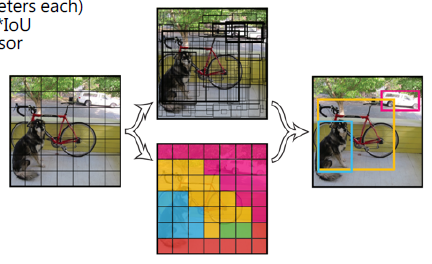
* Architecture
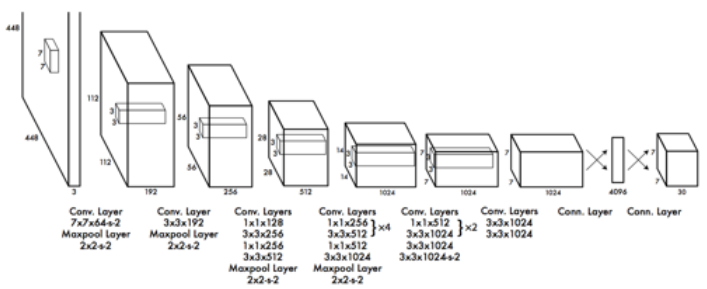
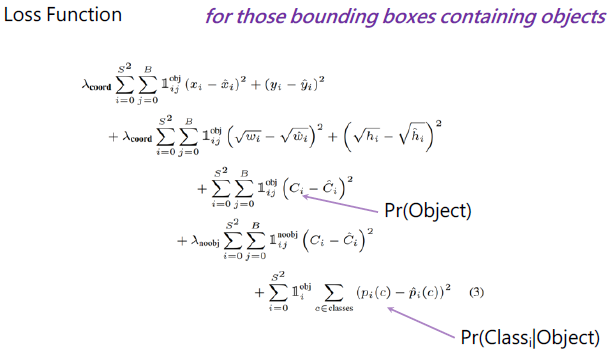
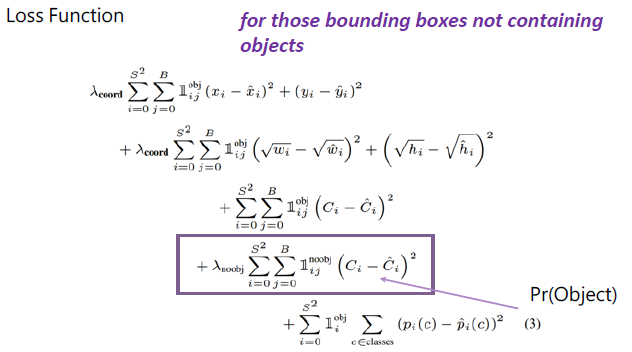
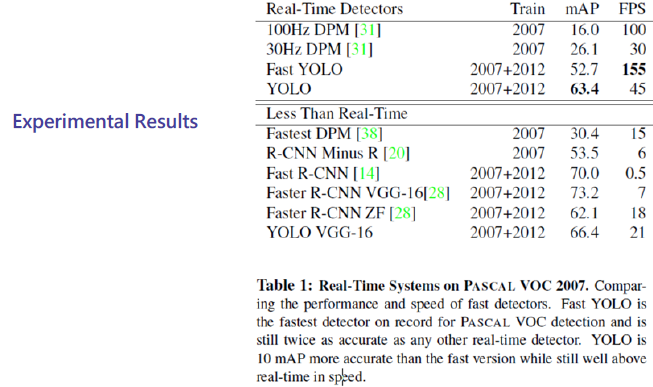
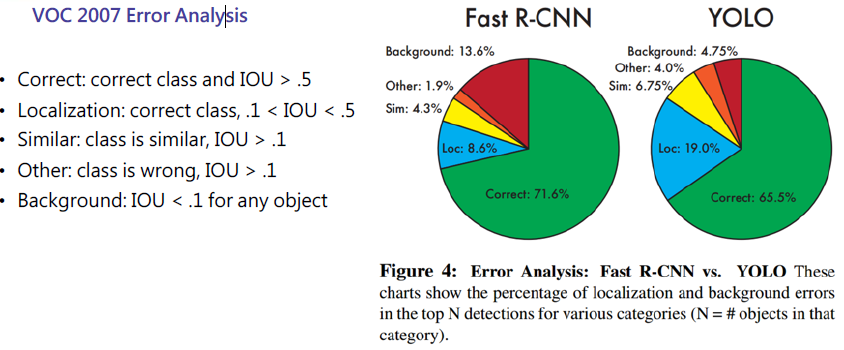
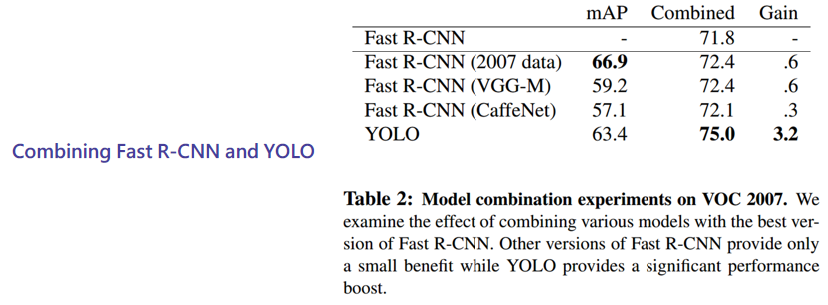
* Lesson learnt from YOLO:
1. Due to the image resolution, YOLO struggles掙扎 with detecting small objects.(影像448*448(影像大)，conv & maxpooling 物體縮很小)
2. Objects with unusual aspect ratios(長寬比) are also hard to be detected.
3. The poor localization also means insuffcient不適合的 IOU.
4. YOLO is the first CNN-based object detector which can run in real-time.
5. The backbone of YOLOv1 is called “Extraction” network which can achieve 90.5% top-5 accuracy on Imagenet.
6. However, in our YOLOv1 implementation, the backbone is darknet19_448 which is the same as YOLOv2.

### 3-4 SSD 介紹：另一種單階段物體偵測模型
* SSD: Single Shot multibox Detector : 像RPN
1. Faster than YOLO, as accurate as Faster R-CNN.
2. Predicts categories類別 and box offsets.
3. Uses small convolutional filters applied to feature maps.
4. Makes predictions using feature maps of different scales不同尺度.
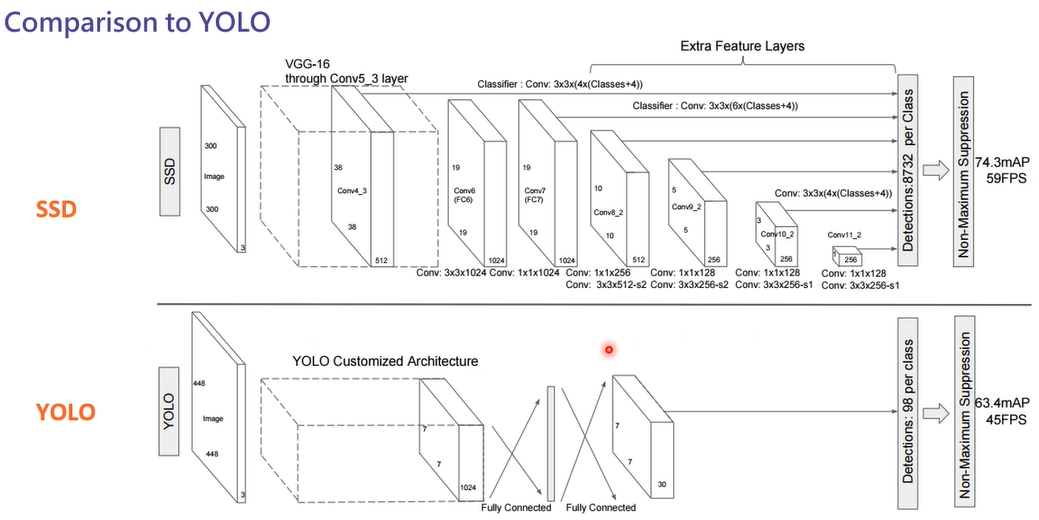
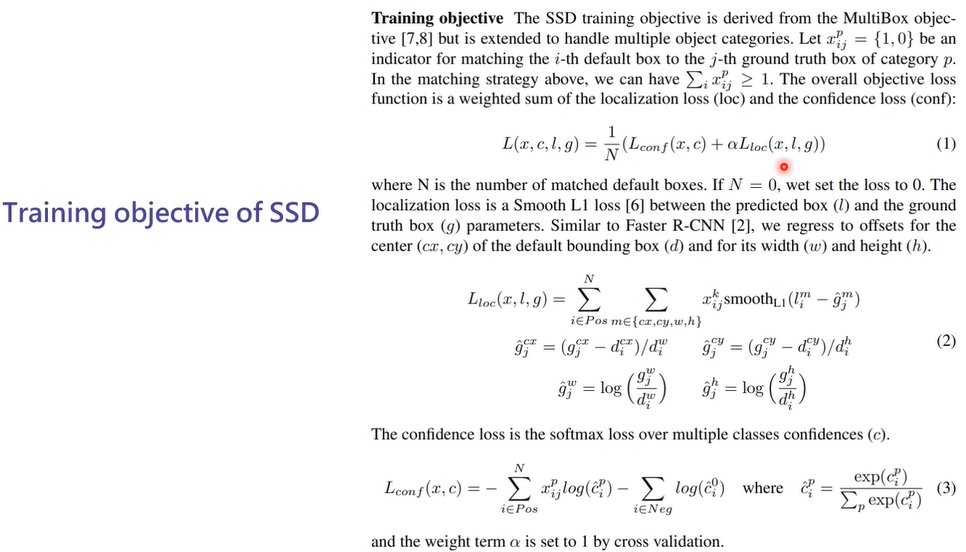
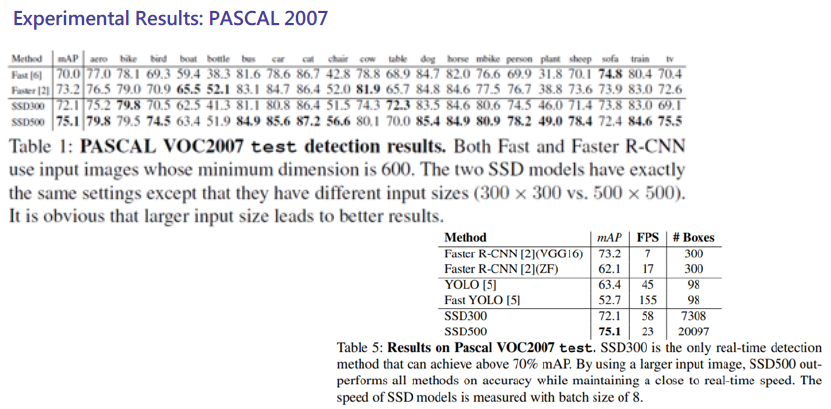
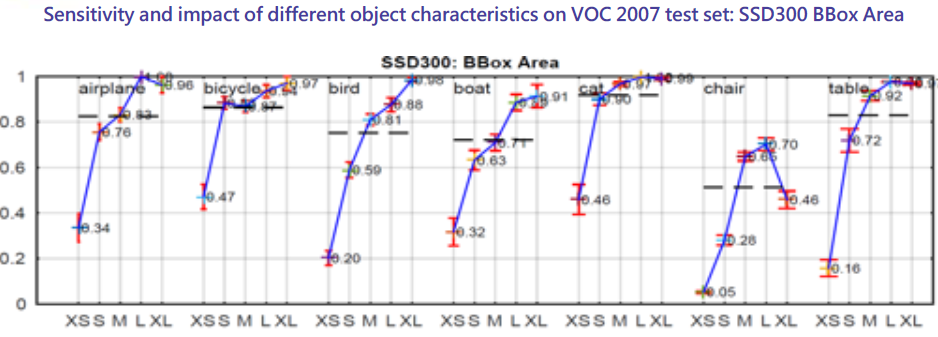
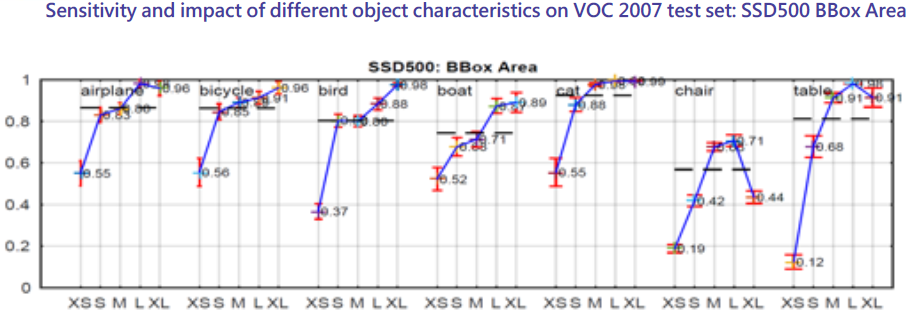
* 總結
1. A key feature of SSD is the use of multi-scale(多尺寸) convolutional bounding box outputs attached to multiple feature maps at the top of the network.
2. SSD demonstrates證明 that given the same VGG-16 base architecture, SSD outperforms勝過 state-of-the-art最先進 object detector counterparts對方 in terms of both accuracy and speed.
3. Please remind that SSD300 is faster and more accurate than YOLO while SSD500 has the same advantage over Faster R-CNN.

### 3-5 YOLOv1 實作1：Pascal VOC資料集上的模型訓練
##### YOLOv1 Implementation-1:
1. Dataset: Pascal VOC 2007
2. Training images: 2501
3. Validation images: 2510
4. Testing images: 4952
5. Number of classes: 20
6. In this implementation, we use trainval as the training data!
##### Example:
1. https://tinyurl.com/y96pe6w4
2. However, the training and testing data would need around 1 GB from your Google drive. 
##### Experiments expected to be done
1. Is shuffle洗牌 for the training dataset really important? Please try to train YOLOv1 without shuffling training data and report the mAP.
2. The current example uses VOC2007_train.txt as training data. Will mAP be increased or decreased when more data (VOC2007_trainval.txt) is used?
3. Can you think of any other variation變動 to boost促進 the mAP?<br>
(1) More grid cells in the last layer: from 7x7 to 14x14.(7*7 改成14*14)<br>
(2) Increasing the input image size.(ex: 由448*448 改為512 *512)<br>
(3) More heavy data augmentation!(truncated cars as data augmentation)<br>
(4) Use a more powerful backbone, such as VGG-16.
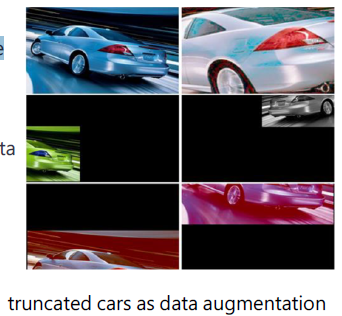
##### Detecting objects of different classes at the grid cell
1. In YOLOv1, every grid cell can only predict at most two objects of the same class
2. In the following images, the person and the car correspond to the same grid cell!
(無法在same grid cell 偵測2個不同物件，bounding box 受兩者影響)
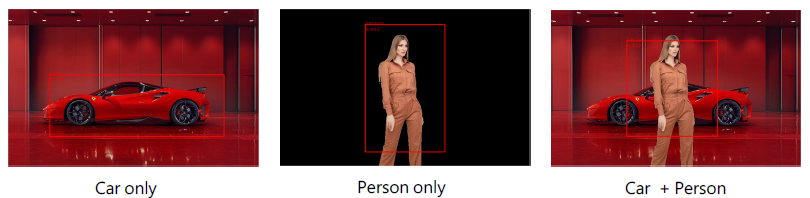

In [ ]:
# 捕充 : tqdm 進度條 =================================
# tqdm參數: 
# desc=None,     str類型，作為進度條說明
# total=None,     預期的迭代次數   
# file=None,     輸出方式，默認為sys.stderr
# ncols=None,    進度條長度
# mininterval=0.1,   進度條最小的更新間隔，單位秒，默認：0.1
# maxinterval=10.0,  進度條最大更新間隔，單位秒，默認：10
# unit='it',      單位，默認it每秒迭代數
# bar_format=None,  進度條格式
# postfix       字典形式信息，例如：速度=5
#=======================================
from tqdm import tqdm,trange
import time
a = [1,2,3]
for i in tqdm(a):
    print('打印a[%d]：'%(i-1),i)
    time.sleep(3)

In [ ]:
text = ""
for char in tqdm(['a','b','c','d']):
    text = text+char
    time.sleep(1)
print(text)

In [ ]:
for i in trange(100):
    time.sleep(0.1)

In [ ]:
#  download file folder ==============================================
from google.colab import drive
import os
# The flag to determine where to put the downloaded files.
# True: zip file will be downloaded to this space
# False:
# manually download file folder from https://drive.google.com/file/d/14KWN84l4O4jSaiFMGnjvw7oauUN7YOn1/view?usp=sharing
# unzip it and upload the folder-YOLO_data_model to the 1st level of your google drive which is actually "/content/drive/My Drive/"
In_this_space_flag = True

if In_this_space_flag == True and os.path.isdir("/content/YOLO_data_model/") == False:
# 1 do everything in this temporary space
    print('here')
    os.system("gdown https://drive.google.com/uc?id=14KWN84l4O4jSaiFMGnjvw7oauUN7YOn1")
    os.system("unzip YOLO_data_model.zip")
    os.remove("YOLO_data_model.zip")
elif In_this_space_flag == False: # and os.path.isdir("/content/drive/My Drive/YOLO_data_model/") == True:   
    drive.mount('/content/drive')
    assert os.path.isdir("/content/drive/My Drive/YOLO_data_model/") == True

In [ ]:
#from google.colab import drive
#drive.mount("/content/drive", force_remount=True)
#drive.mount('/content/gdrive')

from google.colab.patches import cv2_imshow

import cv2 as cv

if In_this_space_flag == True:
  ## version 1: download file 
  # data folder
    VOC_root_dir = "/content/YOLO_data_model/"
else:
  ## version 2: download file 
  # data folder
    VOC_root_dir = "/content/drive/My Drive/YOLO_data_model/"

# Let's try to shown an image for making sure that all the data under the folder-YOLO_data_model is accessible.
img_path = VOC_root_dir + "VOCdevkit/VOC2007/JPEGImages/000001.jpg"
print(img_path)

img1_rgb = cv.imread(img_path) 

cv2_imshow(img1_rgb)

In [ ]:
import torch
import torch.optim as optim
from tqdm import tqdm
import numpy as np
from torchvision import transforms
import time
import os

classes = ["aeroplane", "bicycle", "bird", "boat", "bottle", "bus", "car", "cat",
           "chair", "cow", "diningtable", "dog", "horse", "motorbike", "person",
           "pottedplant", "sheep", "sofa", "train", "tvmonitor"]

bbox_num = 2
box_scale = 7
# learning rate
lr = 0.1e-3 # do remember that this is the initial learning rate; multifixed learning rate is manually written in the training loop
# Do remember that GT of training and testing data are given in two separate ways.
# In VOC2007_trainval.txt, every training jpg file and its corresponding GT (under /content/drive/MyDrive/YOLO_data_model/VOCdevkit/VOC2007/Label) are listed line-by-line.
# So did VOC2007_test.txt. However, in test_result(), although the same data loader (VOCDatasets()) is used, only image file names are used for performing image inference.
# The inference results are stored under detection_result_txt_folder = "/content/drive/MyDrive/YOLO_data_model/detection_temp_folder/".
# Then, mAP is estimated by reading the testing file list-test.txt under "/content/drive/MyDrive/YOLO_data_model/VOCdevkit/VOC2007/ImageSets/Main/"
# and the filenames (no extension) listed line-by-line will be used to read GT (stored in xml files) under "/content/drive/MyDrive/YOLO_data_model/VOCdevkit/VOC2007/Annotation/".
# The GT loaded in terms of pkls for mAP estimation is put under GT_temp_folder = "/content/drive/MyDrive/YOLO_data_model/GT_temp/". 
# training image list
train_image_list = VOC_root_dir + "VOC2007_train.txt"
# tesing image list
eval_image_list = VOC_root_dir + "VOC2007_test.txt"
# folder for training or trained models
model_path = VOC_root_dir + "trained_YOLO_model/"
# pretrained model (darknet19)
pretrain_path = VOC_root_dir + "darknet19_448.conv.23"


# folder for detection result to be used for estimating mAP
detection_result_txt_folder = VOC_root_dir + "detection_temp_folder/"
# folder to store temp GT data (pkl files)
GT_temp_folder = VOC_root_dir + "GT_temp/" 
# log file for mAP estimation corresponding to each epoch
savelog_filename = VOC_root_dir + "savelog.txt"

# 
#model_save_iter = 1  # epochs
epochs_start = 1 #0
epochs_end = 50 #150
batch_size =  12 #24 originally # the size depends on the RAM of GPU
cls_num = len(classes)

## data augmentation
jitter = 0.2
hue = 0.1
saturation = 1.5
exposure = 1.5

# weightings of loss
l_coord = 5
l_noobj = 0.5

YOLO_cfg = {
    'ceils_size':7,
    'class_num':len(classes),
    'box_num':2,
    'image_size':[448,448]
}


In [ ]:
# Model definition ===============================

import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from torch.autograd import Variable

layer_configs = [
        # Unit1 (2)
        (32, 3, True),
        (64, 3, True),
        # Unit2 (3)
        (128, 3, False),
        (64, 1, False),
        (128, 3, True),
        # Unit3 (3)
        (256, 3, False),
        (128, 1, False),
        (256, 3, True),
        # Unit4 (5)
        (512, 3, False),
        (256, 1, False),
        (512, 3, False),
        (256, 1, False),
        (512, 3, True),
        # Unit5 (5)
        (1024, 3, False),
        (512, 1, False),
        (1024, 3, False),
        (512, 1, False),
        (1024, 3, False),
]


class conv_block(nn.Module):
    
    def __init__(self,inplane,outplane,kernel_size,pool,stride=1):
        super(conv_block, self).__init__()
        
        pad = 1 if kernel_size == 3 else 0
        self.conv = nn.Conv2d(inplane, outplane, kernel_size, stride=stride, padding=pad, bias=False)
        self.bn = nn.BatchNorm2d(outplane)
        self.act = nn.LeakyReLU(0.1)
        self.pool = pool #MaxPool2d(2,stride = 2)
        
    def forward(self,x):    
        
        out = self.conv(x)
        out = self.bn(out)
        out = self.act(out)
        
        if self.pool:
            out = F.max_pool2d(out,kernel_size=2,stride=2)
            
        return out


class darknet_19(nn.Module):
    
    def __init__(self,cls_num = 1000):
        super(darknet_19, self).__init__()
        self.class_num = cls_num
        self.feature = self.make_layers(3,layer_configs)

            
    def make_layers(self,inplane,cfg):
        layers = []

        for outplane,kernel_size,pool in cfg:
            layers.append(conv_block(inplane,outplane,kernel_size,pool))
            inplane = outplane
            
            
        return nn.Sequential(*layers)
          
    def load_weight(self,weight_file):
        print("Load pretrained models !")

        fp = open(weight_file, 'rb')
        header = np.fromfile(fp, count=4, dtype=np.int32)
        header = torch.from_numpy(header)
        buf = np.fromfile(fp, dtype = np.float32)
        
        start = 0
        for idx,m in enumerate(self.feature.modules()):
            if isinstance(m, nn.Conv2d):
                conv = m
            if isinstance(m, nn.BatchNorm2d):
                bn = m
                start = load_conv_bn(buf,start,conv,bn)

        assert start == buf.shape[0]
        
    def forward(self, x):
        
        output = self.feature(x)
        
        return output    
    
class YOLO(nn.Module):

    def __init__(self,cls_num,bbox_num = 2,scale_size = 7, pretrained = None):
        super(YOLO, self).__init__()
        
        self.cls_num = cls_num
        self.feature = darknet_19()
        #self.conv_model = conv_model
        if pretrained is not None :
            self.feature.load_weight(pretrained)
            
            
        self.scale_size = scale_size
        self.bbox_num = bbox_num 
        self.last_output = (5*self.bbox_num+self.cls_num)

        cx = torch.linspace(0.5 / scale_size, (scale_size-0.5) / scale_size, steps=scale_size).\
            view(-1, scale_size).repeat(scale_size, 1).view(scale_size, scale_size, -1)
        cy = torch.linspace(0.5 / scale_size, (scale_size-0.5) / scale_size, steps=scale_size).\
            view(scale_size, -1).repeat(1, scale_size).view(scale_size, scale_size, -1)
        self.anchor = torch.cat((cx, cy), 2)
        
        self.local_layer = nn.Sequential()
        
        self.local_layer.add_module('block_1',conv_block(1024,1024,3,False,2))
        
        self.local_layer.add_module('block_2',conv_block(1024,1024,3,False,1))
        
        self.local_layer.add_module('block_3',conv_block(1024,1024,3,False,1))
        
        self.local_layer.add_module('block_4',conv_block(1024,1024,3,False,1))
        

        self.reg_layer = nn.Sequential()

        self.reg_layer.add_module('local_layer', nn.Linear(1024*7*7, 4096))
        self.reg_layer.add_module('leaky_local', nn.LeakyReLU(0.1, inplace=True))
        self.reg_layer.add_module('dropout', nn.Dropout(0.5) )
        self.reg_layer.add_module('fc_1', nn.Linear(4096, (5*self.bbox_num+self.cls_num)*self.scale_size*self.scale_size ))
    
    def forward(self,x):
        B = x.size(0)
        output = self.feature(x)
        output = self.local_layer(output)
        
        output = output.view(output.data.size(0),-1)
            
        output = self.reg_layer(output)

        output = output.view(-1,self.bbox_num*5+self.cls_num,self.scale_size,self.scale_size)

        output = output.permute(0,2,3,1).contiguous()
        
        pred_cls = output[:, :, :, :self.cls_num]
        pred_bbox = torch.cat(
            [output[:, :, :, self.cls_num + 5*j:self.cls_num + 4 + 5*j ] for j in range(self.bbox_num)],
            -1)
        pred_response = torch.cat([output[:, :, :, self.cls_num + 4 + 5*j:self.cls_num + 4+ 5*j +1]
                                   for j in range(self.bbox_num)], -1)
        anchors = self.anchor.repeat((B, 1, 1, 1)).to(pred_bbox.device)
        pred_bbox[:,:,:,0:2] += anchors
        
        return pred_cls,pred_response,pred_bbox
        


def load_conv_bn(buf, start, conv_model, bn_model):
    num_w = conv_model.weight.numel()

    num_b = bn_model.bias.numel()
    bn_model.bias.data.copy_(torch.from_numpy(buf[start:start+num_b]));     start = start + num_b
    bn_model.weight.data.copy_(torch.from_numpy(buf[start:start+num_b]));   start = start + num_b
    bn_model.running_mean.copy_(torch.from_numpy(buf[start:start+num_b]));  start = start + num_b
    bn_model.running_var.copy_(torch.from_numpy(buf[start:start+num_b]));   start = start + num_b

    conv_weight = torch.from_numpy(buf[start:start+num_w])
    conv_model.weight.data.copy_(conv_weight.view_as(conv_model.weight)); start = start + num_w 
    return start

In [ ]:
# load pretrained model (Darknet-19) or unfinished trained model
if epochs_start == 1:
    net = YOLO(cls_num, bbox_num, box_scale, pretrained=pretrain_path)
else:
    net = YOLO(cls_num, bbox_num, box_scale)

net.cuda()
net.train()


if epochs_start > 1:
    net.load_state_dict(torch.load(model_path + 'model_.pkl'))
    
print("load model successfully")

In [ ]:
#BBox encoder, decoder for the last layer (7*7*30) and Non-Maximal Suppression

def yolo_box_encoder(bs):

    bb_class = np.zeros((YOLO_cfg['ceils_size'], YOLO_cfg['ceils_size'], YOLO_cfg['class_num']))
    bb_response = np.zeros((YOLO_cfg['ceils_size'], YOLO_cfg['ceils_size'], YOLO_cfg['box_num']))
    bb_boxes = np.zeros((YOLO_cfg['ceils_size'], YOLO_cfg['ceils_size'], 4 * YOLO_cfg['box_num']))

    for i in range(bs.shape[0]):

        local_x = int( min(0.99,bs[i,0] + bs[i,2] / 2) * YOLO_cfg['ceils_size'])
        local_y = int( min(0.99,bs[i,1] + bs[i,3] / 2) * YOLO_cfg['ceils_size'])

        for j in range(YOLO_cfg['box_num']):
            bb_response[local_y, local_x, j] = 1

            bb_boxes[local_y, local_x, j * 4 + 0] = (bs[i,0] + bs[i,2] /2)
            bb_boxes[local_y, local_x, j * 4 + 1] = (bs[i,1] + bs[i,3] /2)
            bb_boxes[local_y, local_x, j * 4 + 2] = np.sqrt(bs[i,2])
            bb_boxes[local_y, local_x, j * 4 + 3] = np.sqrt(bs[i,3])

        bb_class[local_y, local_x, int(bs[i,4])] = 1

    bb_boxes = torch.from_numpy(bb_boxes).float()
    bb_class = torch.from_numpy(bb_class).float()
    bb_response = torch.from_numpy(bb_response).float()
    boxes = (bb_class,bb_response,bb_boxes)

    return boxes

def py_cpu_nms(dets, scores, thresh):
    # dets:(m,5)  thresh:scaler
    #print(scores.shape)
    temp_len = 0  # np.max(dets[:,2]) * 0.05

    x1 = dets[:, 0]
    y1 = dets[:, 1]
    x2 = x1 + dets[:, 2]  # dets[:, 2]#
    y2 = y1 + dets[:, 3]  # dets[:, 3]#

    areas = (y2 - y1 + temp_len) * (x2 - x1 + temp_len)

    keep = []

    index = scores.argsort()[::-1][:200]


    while index.size > 0:
        i = index[0]  # every time the first is the biggst, and add it directly
        keep.append(i)

        x11 = np.maximum(x1[i], x1[index[1:]])  # calculate the points of overlap
        y11 = np.maximum(y1[i], y1[index[1:]])
        x22 = np.minimum(x2[i], x2[index[1:]])
        y22 = np.minimum(y2[i], y2[index[1:]])

        w = np.maximum(0, x22 - x11 + temp_len)  # the weights of overlap
        h = np.maximum(0, y22 - y11 + temp_len)  # the height of overlap

        overlaps = w * h
        #assert overlaps.all() >= 0
        ious = overlaps / (areas[i] + areas[index[1:]] - overlaps)

        idx = np.where(ious <= thresh)[0]
        index = index[idx + 1]

    return keep

def yolo_box_decoder(pred,conf_thresh=0.01,nms_thresh=0.5):
    box_scale = YOLO_cfg['ceils_size']
    cls_num = YOLO_cfg['class_num']
    box_num = YOLO_cfg['box_num']
    
    pred_cls, pred_response, pred_bboxes = pred
    
    pred_cls = pred_cls.cpu()
    pred_response = pred_response.cpu()
    pred_bboxes = pred_bboxes.cpu()

    prob = pred_response
    max_prob, max_prob_index = prob.max(3)
    boxes = []
    classes = []
    

    max_prob_index = max_prob_index.permute(1,2,0)
    for B in range(1):
        for cls in range(cls_num):

            cls_prob = (pred_cls[B,:,:,cls]*max_prob[B, :, :]).data
            
            mask_box = torch.zeros((box_scale,box_scale,box_num))
            
            mask_box.scatter_(2,max_prob_index,1)
            mask_box = mask_box.unsqueeze(-1)

            mask_box = mask_box.repeat(1,1,1,4).view(box_scale,box_scale,box_num*4)
            mask_box = mask_box.unsqueeze(0).byte()
            mask_box = mask_box.expand_as(pred_bboxes)
            bbox = pred_bboxes[mask_box].data

            bbox = bbox.reshape(-1,4)
            cls_prob = cls_prob.reshape(-1,1)
            
            a = cls_prob.gt(conf_thresh)
            mask_a = a.expand_as(bbox)

            bbox = bbox[mask_a].reshape(-1,4)
            cls_prob = cls_prob[a].reshape(-1,1)

            if bbox.shape[0] > 0:   
                bbox[:,0:2] = bbox[:,0:2] - 0.5*torch.pow(bbox[:,2:4],2)
                bbox[:,2:4] = torch.pow(bbox[:,2:4],2)
                
                pre_cls_box = bbox.data.numpy()
                pre_cls_score = cls_prob.data.view(-1).numpy()
                
                keep = py_cpu_nms(pre_cls_box, pre_cls_score, thresh=nms_thresh)
                for conf_keep, loc_keep in zip(pre_cls_score[keep], pre_cls_box[keep]):
                    boxes.append(loc_keep)
                    classes.append([cls,conf_keep])

    boxes = np.array(boxes)
    classes = np.array(classes)

    return boxes,classes



In [ ]:
# data loader and data augmentation

from PIL import Image,ImageEnhance
from torch.utils import data
import random

def distort_image(im, hue, sat, val):
    im = im.convert('HSV')
    cs = list(im.split())
    cs[1] = cs[1].point(lambda i: i * sat)
    cs[2] = cs[2].point(lambda i: i * val)
    
    def change_hue(x):
        x += hue*255
        if x > 255:
            x -= 255
        if x < 0:
            x += 255
        return x
    cs[0] = cs[0].point(change_hue)
    im = Image.merge(im.mode, tuple(cs))

    im = im.convert('RGB')
    return im

def rand_scale(s):
    scale = random.uniform(1, s)
    if(random.randint(1,10000)%2): 
        return scale
    return 1./scale

def random_distort_image(im, hue, saturation, exposure):
    dhue = random.uniform(-hue, hue)
    dsat = rand_scale(saturation)
    dexp = rand_scale(exposure)
    res = distort_image(im, dhue, dsat, dexp)
    return res


def data_augmentation(img, shape, jitter, hue, saturation, exposure):
    oh = img.height  
    ow = img.width
    
    dw =int(ow*jitter)
    dh =int(oh*jitter)

    pleft  = random.randint(-dw, dw)
    pright = random.randint(-dw, dw)
    ptop   = random.randint(-dh, dh)
    pbot   = random.randint(-dh,dh)

        
    swidth =  ow - pleft - pright
    sheight = oh - ptop - pbot


    sx = float(swidth)  / ow
    sy = float(sheight) / oh
    
    flip = random.randint(1,10000)%2

    cropped = img.crop( (pleft, ptop, pleft + swidth - 1, ptop + sheight - 1))

    dx = (float(pleft)/ow)/sx
    dy = (float(ptop) /oh)/sy


    sized = cropped.resize(shape,Image.NEAREST)
    if flip: 
        sized = sized.transpose(Image.FLIP_LEFT_RIGHT)
    img = random_distort_image(sized, hue, saturation, exposure)
    
    return img, flip, dx,dy,sx,sy 

def fill_truth_detection(bs, flip, dx, dy, sx, sy):

    new_bs = []
    #print(bs)
    for i in range(bs.shape[0]):
        x1 = bs[i][0]
        y1 = bs[i][1]
        x2 = bs[i][0] + bs[i][2]
        y2 = bs[i][1] + bs[i][3]
        
        x1 = min(0.99, max(0, x1 * sx - dx)) 
        y1 = min(0.99, max(0, y1 * sy - dy)) 
            
        x2 = max(0, min(0.999, x2 * sx - dx))
        y2 = max(0, min(0.999, y2 * sy - dy))
            
        
        bs[i][0] = x1
        bs[i][1] = y1 
        bs[i][2] = x2 - x1
        bs[i][3] = y2 - y1
        bs[i][4] = bs[i][4]
        if flip:
            bs[i][0] =  1 - bs[i][0] - bs[i][2]
                
        if bs[i][2] > 0 and bs[i][3] > 0:
            new_bs.append([bs[i]])
   
    new_bs = np.array(new_bs)
    new_bs = np.reshape(new_bs, (-1, 5))

    return new_bs


def norm_bb(b,size):
    x = b[:, 0:1]
    y = b[:, 1:2]

    dw = 1. / size[0]
    dh = 1. / size[1]

    x = (x * dw).clip(0.01, 0.99)
    y = (y * dh).clip(0.01, 0.99)
    w = ((b[:, 2:3] - b[:, 0:1]) * dw).clip(0.01, 0.99)
    h = ((b[:, 3:4] - b[:, 1:2]) * dh).clip(0.01, 0.99)

    return np.concatenate((x, y, w, h, b[:, 4:5]), axis=1)

def load_data_detection(imgpath,labpath ,shape, aug = True, jitter=0.2, hue=0.1, saturation=1.5, exposure=1.5):

    #print('---imgpath={}'.format(imgpath))
    img = Image.open(imgpath).convert('RGB')

    bs = np.loadtxt(labpath,delimiter=',') 
    bs = np.reshape(bs, (-1, 5))
    
    bs = norm_bb(bs,(img.width,img.height))
    
    # data augmentation is applied only in training phase
    if aug:
        img, flip, dx, dy, sx, sy = data_augmentation(img, shape, jitter, hue, saturation, exposure)
    else:
        flip, dx, dy, sx, sy = False, 0, 0, 1, 1
        
    #print(dx, dy, sx, sy)
    label = fill_truth_detection(bs, flip, dx, dy, 1./sx, 1./sy)
    
    return img,label



class VOCDatasets(data.Dataset):
    def __init__(self, transform, list_file, VOC_root_dir, box_encoder = None, train=False):

        self.transform = transform
        self.train = train
        self.label_path = []
        self.image_path = []
        self.box_encoder = box_encoder
        with open(list_file) as f:
            lines = f.readlines()

        self.num_samples = len(lines)

        for line in lines:
            # using "__" instead of "__" because the data path under Google drive is all "/content/drive/MyDrive/...
            # Therefore, the following .split(' ') function would result in error
            # splited = line.strip().split(' ')            
            splited = line.strip().split('__')
            self.image_path.append(VOC_root_dir + splited[0])
            self.label_path.append(VOC_root_dir + splited[1])

    def __getitem__(self, idx):

        file_name = self.image_path[idx]
        gt_path = self.label_path[idx]

        #img,bbox = data_augment(file_name,gt_path,self.train)
        #print('--in __getitem__, file_name={}'.format(file_name))
        img, bbox = load_data_detection(file_name, gt_path, [448, 448], self.train)
        #maximum bbox=50

        if self.box_encoder is not None:
            gt = self.box_encoder(bbox)
        else:
            gt = np.zeros((50, 5), dtype=np.float32)
            gt[:len(bbox), :] = bbox
            gt = torch.from_numpy(gt).float()

        img = self.transform(img)*255

        return img,gt

    def __len__(self):
        return self.num_samples

# remember that the following tansform would only accept PIL images as input
transform = transforms.Compose([
    transforms.Resize([448, 448]),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [1, 1, 1])
])


dataset = VOCDatasets(transform, train_image_list, VOC_root_dir, yolo_box_encoder, train=True) # train=true will apply data augmentation

train_loader = data.DataLoader(dataset=dataset,
                              batch_size=batch_size,
                              shuffle=True,
                              num_workers=1)

In [ ]:
# YOLO loss

import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable

class yolov1_loss(nn.Module):
    def __init__(self, B, l_coord, l_noobj,device='cuda' ,cls_num=20):
        super(yolov1_loss, self).__init__()
        self.B = B # bbox_num
        self.l_coord = l_coord
        self.l_noobj = l_noobj
        self.class_num = cls_num
        self.device = device

    def compute_iou(self, box1, box2):
        '''Compute the intersection over union of two set of boxes, each box is [x1,y1,x2,y2].
        Args:
          box1: (tensor) bounding boxes, sized [N,4].
          box2: (tensor) bounding boxes, sized [M,4].
        Return:
          (tensor) iou, sized [N,M].
        '''

        lt = torch.max(
            box1[:, :2],  # [N,2] -> [N,1,2] -> [N,M,2]
            box2[:, :2],  # [M,2] -> [1,M,2] -> [N,M,2]
        )

        rb = torch.min(
            box1[:, 2:],  # [N,2] -> [N,1,2] -> [N,M,2]
            box2[:, 2:],  # [M,2] -> [1,M,2] -> [N,M,2]
        )

        wh = rb - lt  # [N,M,2]
        wh[wh < 0] = 0  # clip at 0
        inter = wh[:, 0] * wh[:, 1]  # [N,M]

        area1 = (box1[:, 2] - box1[:, 0]) * (box1[:, 3] - box1[:, 1])  # [N,]
        area2 = (box2[:, 2] - box2[:, 0]) * (box2[:, 3] - box2[:, 1])  # [M,]

        iou = inter / (area1 + area2 - inter)
        return iou

    def forward(self,pred,target):
        #print(target)
        pred_cls, pred_response, pred_bboxes = pred
        label_cls, label_response, label_bboxes = target


        pred_cls = pred_cls.to(self.device)
        pred_response =  pred_response.to(self.device)
        pred_bboxes = pred_bboxes.to(self.device)

        label_cls = label_cls.to(self.device)
        label_response =  label_response.to(self.device)
        label_bboxes = label_bboxes.to(self.device)


        batch_size = pred_response.size(0)

        no_obj_mask = (label_response[:, :, :, 0] < 1).unsqueeze(-1).expand_as(label_response)

        obj_response_mask = (label_response[:, :, :, 0] > 0).unsqueeze(-1).expand_as(label_response)

        obj_box_mask = (label_response[:, :, :, 0] > 0).unsqueeze(-1).expand_as(label_bboxes)

        obj_cls_mask = (label_response[:, :, :, 0] > 0).unsqueeze(-1).expand_as(label_cls)

        no_obj_contain_pred = pred_response[no_obj_mask].view(-1)
        no_obj_contain_target = label_response[no_obj_mask].view(-1)


        obj_contain_pred = pred_response[obj_response_mask].view(-1, self.B)

        obj_contain_target = label_response[obj_response_mask].view(-1, self.B)

        # class pred response
        obj_class_pred = pred_cls[obj_cls_mask].view(-1, self.class_num)
        obj_class_target = label_cls[obj_cls_mask].view(-1, self.class_num)

        # box pred response
        obj_loc_pred = pred_bboxes[obj_box_mask].view(-1, self.B * 4)
        obj_loc_target = label_bboxes[obj_box_mask].view(-1, self.B * 4)

        iou = torch.zeros(obj_loc_pred.size(0), self.B)
        iou = Variable(iou)

        for j in range(self.B):
            pred_bb = torch.zeros(obj_loc_pred.size(0), 4)
            pred_bb = Variable(pred_bb)

            target_bb = torch.zeros(obj_loc_pred.size(0), 4)
            target_bb = Variable(target_bb)

            target_bb[:, 0] = obj_loc_target[:, j * 4] - 0.5 * pow(obj_loc_target[:, j * 4 + 2], 2)
            target_bb[:, 1] = obj_loc_target[:, j * 4 + 1] - 0.5 * pow(obj_loc_target[:, j * 4 + 3], 2)
            target_bb[:, 2] = obj_loc_target[:, j * 4] + 0.5 * pow(obj_loc_target[:, j * 4 + 2], 2)
            target_bb[:, 3] = obj_loc_target[:, j * 4 + 1] + 0.5 * pow(obj_loc_target[:, j * 4 + 3], 2)

            pred_bb[:, 0] = obj_loc_pred[:, j * 4] - 0.5 * pow(obj_loc_pred[:, j * 4 + 2], 2)
            pred_bb[:, 1] = obj_loc_pred[:, j * 4 + 1] - 0.5 * pow(obj_loc_pred[:, j * 4 + 3], 2)
            pred_bb[:, 2] = obj_loc_pred[:, j * 4] + 0.5 * pow(obj_loc_pred[:, j * 4 + 2], 2)
            pred_bb[:, 3] = obj_loc_pred[:, j * 4 + 1] + 0.5 * pow(obj_loc_pred[:, j * 4 + 3], 2)

            iou[:, j] = self.compute_iou(target_bb, pred_bb)

        max_iou, max_index = iou.max(1)
        min_iou, _ = iou.min(1)
        max_index = max_index.data.cpu()

        coo_response_mask = torch.ByteTensor(obj_loc_pred.size(0), self.B * 4).to(self.device)

        coo_response_mask.zero_()
        for i in range(obj_loc_pred.size(0)):
            coo_response_mask[i, max_index[i] * 4:max_index[i] * 4 + 4] = 1

        obj_axis_pred = obj_loc_pred[coo_response_mask].view(-1, 4)
        obj_axis_target = obj_loc_target[coo_response_mask].view(-1, 4)

        iou_response_mask = coo_response_mask[:, [i * 4 for i in range(self.B)]]

        obj_response_pred = obj_contain_pred[iou_response_mask].view(-1)
        obj_response_target = obj_contain_target[iou_response_mask].view(-1)

        obj_local_loss = F.mse_loss(obj_axis_pred[:, 0:2], obj_axis_target[:, 0:2], size_average=False) + \
                         F.mse_loss(obj_axis_pred[:, 2:4], obj_axis_target[:, 2:4], size_average=False)
        obj_class_loss = F.mse_loss(obj_class_pred, obj_class_target, size_average=False)


        max_iou = (max_iou.data).to(self.device)
        conf_id = ((1 - max_iou) * self.l_noobj + max_iou).to(self.device)

        conf_id = Variable(conf_id, requires_grad=True)

        obj_contain_loss = F.mse_loss(obj_response_pred, max_iou, size_average=False)

        no_obj_contain_loss = F.mse_loss(no_obj_contain_pred, no_obj_contain_target, size_average=False)

        iou_loss = F.mse_loss(max_iou, obj_response_target, size_average=False)

        loss_all = (self.l_coord * obj_local_loss + obj_class_loss + obj_contain_loss + self.l_noobj * no_obj_contain_loss + iou_loss) / batch_size

        loss_info = {
            'local_loss': self.l_coord * obj_local_loss.data,
            'class_loss': obj_class_loss.data,
            'contain_loss': obj_contain_loss.data,
            'no_contain_loss': self.l_noobj * no_obj_contain_loss,
            'iou_loss': iou_loss,
            'mean_iou': torch.mean(max_iou)
        }

        return loss_all, loss_info

In [ ]:
# optimizer and loss

optimizer = optim.SGD(net.parameters(), lr=lr, momentum=0.9, weight_decay=5e-4)

device='cuda'

loss_detect = yolov1_loss(bbox_num, l_coord, l_noobj, device, cls_num)

# do remind the difference between step & epoch
step = epochs_start * len(train_loader)

best_score = 0
eval_score = 0

In [ ]:
# mAP estimation


import xml.etree.ElementTree as ET
import os
import pickle
import numpy as np
import cv2


def parse_rec(filename):
    """ Parse a PASCAL VOC xml file """
    tree = ET.parse(filename)
    objects = []
    for obj in tree.findall('object'):
        obj_struct = {}
        obj_struct['name'] = obj.find('name').text
        obj_struct['pose'] = obj.find('pose').text
        obj_struct['truncated'] = int(obj.find('truncated').text)
        obj_struct['difficult'] = int(obj.find('difficult').text)
        bbox = obj.find('bndbox')
        obj_struct['bbox'] = [int(bbox.find('xmin').text),
                              int(bbox.find('ymin').text),
                              int(bbox.find('xmax').text),
                              int(bbox.find('ymax').text)]
        objects.append(obj_struct)

    return objects


def voc_ap(rec, prec, use_07_metric=False):
    """ ap = voc_ap(rec, prec, [use_07_metric])
    Compute VOC AP given precision and recall.
    If use_07_metric is true, uses the
    VOC 07 11 point method (default:False).
    """
    if use_07_metric:
        # 11 point metric
        ap = 0.
        for t in np.arange(0., 1.1, 0.1):
            if np.sum(rec >= t) == 0:
                p = 0
            else:
                p = np.max(prec[rec >= t])
            ap = ap + p / 11.
    else:
        # correct AP calculation
        # first append sentinel values at the end
        mrec = np.concatenate(([0.], rec, [1.]))
        mpre = np.concatenate(([0.], prec, [0.]))

        # compute the precision envelope
        for i in range(mpre.size - 1, 0, -1):
            mpre[i - 1] = np.maximum(mpre[i - 1], mpre[i])

        # to calculate area under PR curve, look for points
        # where X axis (recall) changes value
        i = np.where(mrec[1:] != mrec[:-1])[0]

        # and sum (\Delta recall) * prec
        ap = np.sum((mrec[i + 1] - mrec[i]) * mpre[i + 1])
    return ap


def voc_eval(detpath,
             annopath,
             imagesetfile,
             classname,
             cachedir,
             ovthresh=0.5,
             use_07_metric=False):
    """rec, prec, ap = voc_eval(detpath,
                                annopath,
                                imagesetfile,
                                classname,
                                [ovthresh],
                                [use_07_metric])

    Top level function that does the PASCAL VOC evaluation.

    detpath: Path to detections
        detpath.format(classname) should produce the detection results file.
    annopath: Path to annotations
        annopath.format(imagename) should be the xml annotations file.
    imagesetfile: Text file containing the list of images, one image per line.
    classname: Category name (duh)
    cachedir: Directory for caching the annotations
    [ovthresh]: Overlap threshold (default = 0.5)
    [use_07_metric]: Whether to use VOC07's 11 point AP computation
        (default False)
    """
    # assumes detections are in detpath.format(classname)
    # assumes annotations are in annopath.format(imagename)
    # assumes imagesetfile is a text file with each line an image name
    # cachedir caches the annotations in a pickle file

    # first load gt
    if not os.path.isdir(cachedir):
        os.mkdir(cachedir)
    cachefile = os.path.join(cachedir, 'annots.pkl')
    # read list of images
    with open(imagesetfile, 'r') as f:
        lines = f.readlines()
    imagenames = [x.strip() for x in lines]


    if not os.path.isfile(cachefile):
        # load annots
        recs = {}
        for i, imagename in enumerate(imagenames):
            recs[imagename] = parse_rec(annopath.format(imagename))
            if i % 100 == 0:
                print('Reading annotation for {:d}/{:d}'.format(
                    i + 1, len(imagenames)))
        # save
        print('Saving cached annotations to {:s}'.format(cachefile))
        with open(cachefile, 'wb') as f:
            pickle.dump(recs, f)
    else:
        # load
        with open(cachefile, 'rb') as f:
            recs = pickle.load(f)

    # extract gt objects for this class
    class_recs = {}
    npos = 0
    for imagename in imagenames:
        R = [obj for obj in recs[imagename] if obj['name'] == classname]
        bbox = np.array([x['bbox'] for x in R])
        difficult = np.array([x['difficult'] for x in R]).astype(np.bool)
        det = [False] * len(R)
        npos = npos + sum(~difficult)
        class_recs[imagename] = {'bbox': bbox,
                                 'difficult': difficult,
                                 'det': det}

    # read dets
    detfile = detpath.format(classname)
    with open(detfile, 'r') as f:
        lines = f.readlines()
    #print('----lines={}'.format(lines))
    # using "__" instead of " " because the data path under Google drive is all "/content/drive/MyDrive/...
    # Therefore, the following .split(' ') function would result in error
    #splitlines = [x.strip().split('__') for x in lines]
    splitlines = [x.strip().split(' ') for x in lines]
    image_ids = [x[0] for x in splitlines]
    confidence = np.array([float(x[1]) for x in splitlines])
    BB = np.array([[float(z) for z in x[2:]] for x in splitlines])
    #print('----BB={}'.format(BB))
    # sort by confidence
    sorted_ind = np.argsort(-confidence)
    sorted_scores = np.sort(-confidence)
    BB = BB[sorted_ind, :]
    image_ids = [image_ids[x] for x in sorted_ind]

    # go down dets and mark TPs and FPs
    nd = len(image_ids)
    tp = np.zeros(nd)
    fp = np.zeros(nd)
    for d in range(nd):
        R = class_recs[image_ids[d]]
        bb = BB[d, :].astype(float)
        ovmax = -np.inf
        BBGT = R['bbox'].astype(float)

        if BBGT.size > 0:
            # compute overlaps
            # intersection
            ixmin = np.maximum(BBGT[:, 0], bb[0])
            iymin = np.maximum(BBGT[:, 1], bb[1])
            ixmax = np.minimum(BBGT[:, 2], bb[2])
            iymax = np.minimum(BBGT[:, 3], bb[3])
            iw = np.maximum(ixmax - ixmin + 1., 0.)
            ih = np.maximum(iymax - iymin + 1., 0.)
            inters = iw * ih

            # union
            uni = ((bb[2] - bb[0] + 1.) * (bb[3] - bb[1] + 1.) +
                   (BBGT[:, 2] - BBGT[:, 0] + 1.) *
                   (BBGT[:, 3] - BBGT[:, 1] + 1.) - inters)

            overlaps = inters / uni
            ovmax = np.max(overlaps)
            jmax = np.argmax(overlaps)

        if ovmax > ovthresh:
            if not R['difficult'][jmax]:
                if not R['det'][jmax]:
                    tp[d] = 1.
                    R['det'][jmax] = 1
                else:
                    fp[d] = 1.
        else:
            fp[d] = 1.

    # compute precision recall
    fp = np.cumsum(fp)
    tp = np.cumsum(tp)
    rec = tp / float(npos)
    # avoid divide by zero in case the first detection matches a difficult
    # ground truth
    prec = tp / np.maximum(tp + fp, np.finfo(np.float64).eps)
    ap = voc_ap(rec, prec, use_07_metric)

    return rec, prec, ap

def _do_python_eval_quite(res_prefix,_devkit_path ,output_dir=''):
    # do remind only PAScal VOC 07 test needs to use use_07_metric ==  True 
    # simply replace 2007 with year bigger than 2010 will work
    _year = '2007'
    _classes = ('__background__',  # always index 0
                'aeroplane', 'bicycle', 'bird', 'boat',
                'bottle', 'bus', 'car', 'cat', 'chair',
                'cow', 'diningtable', 'dog', 'horse',
                'motorbike', 'person', 'pottedplant',
                'sheep', 'sofa', 'train', 'tvmonitor')   
    filename = res_prefix + '{:s}.txt'
    # annopath indicates where xml files are
    annopath = os.path.join(
        _devkit_path,
        'VOCdevkit',
        'VOC' + _year,
        'Annotations',
        '{:s}.xml')
    # imagesetfile indicates where test.txt (testing list) is
    imagesetfile = os.path.join(
        _devkit_path,
        'VOCdevkit',
        'VOC' + _year,
        'ImageSets',
        'Main',
        'test.txt') # test.txt
    # cachedir = os.path.join(_devkit_path, 'annotations_cache') # revised by Alex
    # cachedir indicates where annots.pkl is!
    cachedir = GT_temp_folder
    aps = []

    result = dict()
    # The PASCAL VOC metric changed in 2010
    use_07_metric = True if int(_year) < 2010 else False
    # print('VOC07 metric? ' + ('Yes' if use_07_metric else 'No'))
    if not os.path.isdir(output_dir):
        os.mkdir(output_dir)

    print("Begin to perform mAP estimation")
    for i, cls in enumerate(_classes):
        if cls == '__background__':
            continue

        rec, prec, ap = voc_eval(
            filename, annopath, imagesetfile, cls, cachedir, ovthresh=0.5,
            use_07_metric=use_07_metric)
        aps += [ap]
        # print('AP for {} = {:.4f}'.format(cls, ap))
        result[cls] = ap
        # the following file (rec, prec, & ap of each class) is only for back-up.
        with open(os.path.join(output_dir, cls + '_pr.pkl'), 'wb') as f:
            pickle.dump({'rec': rec, 'prec': prec, 'ap': ap}, f)

    return result    


def test_result(model, prefix, VOC_root_dir, outfile, test_list):
    class_num = cls_num
    #list_file = 'VOC2007_test.txt'

    dataset = VOCDatasets(transform,test_list, VOC_root_dir,None, False)

    test_loader = data.DataLoader(dataset=dataset,
                                  batch_size=1,
                                  shuffle=False,
                                  num_workers=2)

    test_loader = tqdm(test_loader)

    #list_file = test_list
    lines = []
    with open(test_list) as f:
        lines = f.readlines()

    fps = [0] * class_num
    if not os.path.exists(outfile):
        os.mkdir(outfile)
    for i in range(class_num):
        buf = '%s/%s%s.txt' % (prefix, outfile, classes[i])
        fps[i] = open(buf, 'w')
   
    # do remember that label (of testing data) is not used in the following for-loop
    # the detection results stored in txt files will be evaluated in _do_python_eval_quite() by reading xml files.
    for lineId, (images, label) in enumerate(test_loader):
        t1 = time.time()
        #img = cv2.imread(lines[lineId].split(" ")[0])
        img = cv2.imread(VOC_root_dir + lines[lineId].split("__")[0])
        width, height = img.shape[1], img.shape[0]

        images = images.cuda()

        t2 = time.time()
        #print("load times: ",t2-t1)
        
        t1 = time.time()
        pred = model(images)
        t2 = time.time()
        #print("pred times: ",t2-t1)
        
        t1 = time.time()
        pred_boxes,pred_conf = yolo_box_decoder(pred)
        t2 = time.time()
        #print("decoder times: ",t2-t1)
        
        fileId = os.path.basename(lines[lineId]).split('.')[0]

        for j in range(len(pred_boxes)):

            x1 = pred_boxes[j,0]
            y1 = pred_boxes[j,1]
            x2 = x1 + pred_boxes[j,2]
            y2 = y1 + pred_boxes[j,3]

            x1,x2 = x1*width,x2*width
            y1,y2 = y1*height,y2*height

            cls_id = int(pred_conf[j,0])
            scores = pred_conf[j,1]
            #print(scores)
            fps[cls_id].write('%s %.3f %.1f %.1f %.1f %.1f\n' %
                              (fileId, scores, x1 + 1, y1 + 1, x2 + 1, y2 + 1))
            
            ## uncomment the following section to produce detection results of the current epoch
            '''
            if scores > 0.2:
                cv2.rectangle(img,(int(x1),int(y1)-20),(int(x2),int(y1)),(125,125,125),-1)
                img = cv2.putText(img, classes[cls_id] + ': %.2f' % round(scores,3), (int(x1),int(y1)),  cv2.FONT_HERSHEY_PLAIN, 1.5, (0,0,0), thickness=1)
                #img = cv2.putText(img, str(round(scores,3)), (int(x1),int(y1)+20),  cv2.FONT_HERSHEY_PLAIN, 2.0, (0,0,0), thickness=1)
                img = cv2.rectangle(img, (int(x1),int(y1)), (int(x2),int(y2)), (0, 255, 0), 2)
                filename = lines[lineId].split(" ")[0]
                filename_only = filename.split("/")[-1]          
                cv2.imwrite('/content/drive/MyDrive/YOLO_data_model/voc07_det_results/' + filename_only, img)
            '''

    for i in range(class_num):
        fps[i].close()

    return

def eval_mAp(model, prefix, VOC_root_dir, outfile, test_list):
    # prefix = /content/drive/MyDrive/YOLO_data_model/detection_temp_folder
    # outfile = VOC
    # res_prefix is result temp folder
    res_prefix = prefix + '/' + outfile # /content/drive/MyDrive/YOLO_data_model/detection_temp_folder/VOC and the detection file will be VOCCar.txt, VOCTruck.txt etc,.
    # test_list = "/content/drive/MyDrive/YOLO_data_model/VOC2007_test_toy_example.txt"
    # perform inference for every test file
    test_result(model, prefix, VOC_root_dir, outfile, test_list)
    # output_dir is the folder to put GT pkl files and GT_temp_folder = /content/drive/MyDrive/YOLO_data_model/GT_temp_folder
    # VOC_root_dir = "/content/drive/MyDrive/YOLO_data_model/VOCdevkit"
    result = _do_python_eval_quite(res_prefix, VOC_root_dir ,output_dir = GT_temp_folder)

    return result    

In [ ]:
## training codes:

best_score = 0
eval_score = 0


for epoch in range(epochs_start, epochs_end):
    epoch_loss = 0
    train_iterator = tqdm(train_loader, ncols=30)
    mulit_batch_ = 0
    #print("epoch={}".format(epoch))
    if epoch == 0:
        learning_rate = lr/10
    elif epoch >= 1 and epoch <=5:
        learning_rate = 0.2e-3/10
    elif epoch <= 10:
        learning_rate = 0.2e-3/10
    elif epoch <= 30:
        learning_rate= 0.0001/10
    elif epoch <= 40:
        learning_rate=0.00001
    else: 
        learning_rate=0.00001
        
    for param_group in optimizer.param_groups:
        param_group['lr'] = learning_rate

    for train_batch, (images, target) in enumerate(train_iterator):
        print('--------------------------train_batch={}'.format(train_batch))

        images = images.cuda()

        pred = net(images)

        loss_xx, loss_info = loss_detect(pred, target)

        assert not np.isnan\
            (loss_xx.data.cpu().numpy())

        epoch_loss += loss_xx

        status = '[{0}] lr = {1} batch_loss = {2:.3f} epoch_loss = {3:.3f} '.format(
            epoch, learning_rate, loss_xx.data, epoch_loss.data / (train_batch + 1))



        train_iterator.set_description(status)

        loss_xx.backward()

        optimizer.step()
        optimizer.zero_grad()
        step += 1

    if epoch % 1 == 0: # and epoch > 5:
        print("Evaluate~~~~~   ")
        net.eval()
        result = eval_mAp(net, detection_result_txt_folder, VOC_root_dir,'voc', eval_image_list)
        eval_score = np.mean(list(result.values()))

        net.train()

        if best_score < eval_score:
            best_score = eval_score
            torch.save(net.state_dict(), model_path + "best_.pkl")
        mAP_string = "mean ap : {:.3f} , best ap: {:.3f}".format(eval_score, best_score)
        print(mAP_string)
        
        with open(savelog_filename, 'a') as f:
            print('%s %s' % (time.strftime("%Y-%m-%d %H:%M:%S", time.localtime()), mAP_string), file=f)
        
    torch.save(net.state_dict(), model_path + "model_.pkl")
    
print(best_score)


In [ ]:
  #  Let's try to perform inference for single image

def predict_gpu(model,image_name):
    
    image = cv2.imread(image_name)       
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    h,w,_ = image.shape
    img = cv2.resize(image,(448,448)) 
    
    # Do remember that the following transform only accepts input to be numpy array instead PIL image
    # Therefore, the previously-defined transfroms() can't be used here
    transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize([0.485, 0.456, 0.406], [1, 1, 1])])
    # image is an torch tensor    
    img = transform(img)*255    
    #  None = NP.newaxis and the reason why doing this is that model inference would only accept 4-d torch tensor.
    img = Variable(img[None,:,:,:])
    img = img.cuda()
        
    pred= model(img)
    # detection_classses contains object id and its confidence
    boxes, detection_classses = yolo_box_decoder(pred,conf_thresh=0.2,nms_thresh=0.5)
    
    return boxes,detection_classses
 
def plot_boxes_cv2(img, boxes, detection_classses, class_names=None, color=None):

    width = img.shape[1]
    height = img.shape[0]    

    for j in range(len(boxes)):
        
        x1 = boxes[j,0]
        y1 = boxes[j,1]
        x2 = x1 + boxes[j,2]
        y2 = y1 + boxes[j,3]
        x1,x2 = int(x1*width),int(x2*width)
        y1,y2 = int(y1*height),int(y2*height)
        
        cls_id = int(detection_classses[j,0])
        prob = float(detection_classses[j,1])
        print(prob)

        img = cv2.putText(img, class_names[cls_id], (x1,y1),  cv2.FONT_HERSHEY_PLAIN, 1.0, (0,0,255), thickness=1)
        img = cv2.putText(img, str(round(prob,3)), (x1,y1+20),  cv2.FONT_HERSHEY_PLAIN, 1.0, (0,0,255), thickness=1)
        img = cv2.rectangle(img, (x1,y1), (x2,y2), (0, 0, 255), 2)
            
    return img

model = YOLO(cls_num, bbox_num, box_scale)
model.eval()
# 1. load your best model trained so far.
#model.load_state_dict(torch.load( model_path + 'best_.pkl'))
# 2. load example model trained for only a few epochs
#model.load_state_dict(torch.load( model_path + 'example_model_mAP14.1.pkl'))
model.load_state_dict(torch.load( model_path + 'best_mAP33.6.pkl'))


model.cuda()
        
# testing image
image_name = VOC_root_dir + "VOCdevkit/VOC2007/JPEGImages/000001.jpg"
#image_name = VOC_root_dir + "testing_imgs/car_only.jpg"
#image_name = VOC_root_dir + "testing_imgs/beauty_only.jpg"
#image_name = VOC_root_dir + "testing_imgs/car_n_beauty.jpg"
 
image = cv2.imread(image_name)
# performing inference           
boxes, detection_classses = predict_gpu(model,image_name)
# overlapping detection bounding box
image = plot_boxes_cv2(image, boxes, detection_classses, class_names = classes, color=None)
   
cv2_imshow(image)    


### Diffcheker : compare text : 比較程式修改過哪些地方